<a href="https://colab.research.google.com/github/TrixSanchez/IAyRN_AGO-DIC2024/blob/main/PIA_IAyRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTEGRANTES**
Alan Alonso López Olveda 1919501 IMTC
Ángel Sánchez Vázquez 1901110 IMTC
Adael Almanza Rodríguez 1962143 IMTC

**PIA**
IAyRN_2024 Semestre Ago-Dic
Red_Neuronal_Convolusional de animales marinos
**INGE**
Daniel Isaias Lopez Paez

**Paso** **1**: Subir el archivo kaggle.json y configurar Kaggle para descargar el dataset.

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


**Paso** **2**: Descargar y extraer el dataset de animales marinos desde Kaggle.

In [ ]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste
!unzip sea-animals-image-dataste.zip -d sea_animals_data


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: sea_animals_data/Seahorse/9891995103_849905035f_o.jpg  
  inflating: sea_animals_data/Seahorse/9984393_fb8ac77d6a_o.jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (1).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (10).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (11).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (12).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (13).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (14).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (15).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (16).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (17).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (18).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (19).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (2).jpg  
  inflating: sea_animals_data/Seahorse/Sea Horse (20).jpg  
  inflating: sea_ani

**EL MENSAJE EN AMARILLO SOLO SIGNIFICA QUE COLAB LIMITÓ EL TEXTO MOSTRADO EN CELDA, MÁS NO SIGNIFICA QUE NO SE EJECUTÓ CORRECTAMENTE**

**Paso** **3**: **Procesar** **las** **Imágenes**
En este paso, redimensionaremos todas las imágenes a un tamaño de 280x180 píxeles, las convertiremos al formato .jpg y las aseguraremos de que tengan 3 canales de color (RGB). Esto garantizará que todas las imágenes estén listas para ser utilizadas en el modelo de red neuronal.

In [ ]:
from PIL import Image
import os

input_folder = "sea_animals_data"
output_folder = "processed_data"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

target_size = (280, 180)

for folder_name in os.listdir(input_folder):
    folder_path = os.path.join(input_folder, folder_name)

    if os.path.isdir(folder_path):
        output_class_folder = os.path.join(output_folder, folder_name)
        if not os.path.exists(output_class_folder):
            os.makedirs(output_class_folder)

        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            try:
                with Image.open(image_path) as img:
                    img = img.convert("RGB")
                    img = img.resize(target_size)
                    output_image_path = os.path.join(output_class_folder, f"{image_name.split('.')[0]}.jpg")
                    img.save(output_image_path, "JPEG")

            except Exception as e:
                print(f"No se pudo procesar la imagen {image_name}: {e}")

print("Todas las imágenes han sido procesadas.")


Todas las imágenes han sido procesadas.


**Paso** **4**: **Importar** **Librerías** **para** **Entrenar** **la** **Red** **Neuronal**
En este paso, importamos las librerías necesarias para construir y entrenar nuestra red neuronal convolucional utilizando TensorFlow y Keras. Estas librerías nos permitirán cargar y procesar los datos, usar un modelo preentrenado, definir nuevas capas y optimizar el entrenamiento.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


**PASO 5: CARGAR DATOS PARA ENTRENAMIENTO**
En este paso, configuramos el generador de imágenes para cargar y preprocesar las imágenes de entrenamiento. Utilizamos el 80% de las imágenes para el entrenamiento y el 20% restante para la validación.

In [ ]:
train_dir = 'processed_data'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(280, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(280, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 10969 images belonging to 23 classes.
Found 2730 images belonging to 23 classes.


**PASO 6: SELECCIÓN DEL MODELO DE ENTRENAMIENTO DESDE CERO**
En este paso, construimos un modelo CNN desde cero con capas convolucionales y densas para clasificación. El modelo se compila con el optimizador Adam y la pérdida categorical_crossentropy.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(280, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


**PASO 7: ENTRENAMIENTO DEL MODELO**
En este paso, entrenamos el modelo utilizando los datos que hemos cargado previamente. Utilizamos el generador de datos train_generator para alimentar las imágenes al modelo, y entrenamos por un número definido de épocas.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


342/342 ━━━━━━━━━━━━━━━━━━━━ 1603s 5s/step - accuracy: 0.1916 - loss: 2.8334 - val_accuracy: 0.2765 - val_loss: 2.4091
Epoch 2/10
  1/342 ━━━━━━━━━━━━━━━━━━━━ 27:52 5s/step - accuracy: 0.1875 - loss: 2.5277

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 939us/step - accuracy: 0.1875 - loss: 2.5277 - val_accuracy: 0.2000 - val_loss: 2.2412
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1621s 5s/step - accuracy: 0.2532 - loss: 2.4683 - val_accuracy: 0.3158 - val_loss: 2.2550
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.3750 - loss: 2.1022 - val_accuracy: 0.5000 - val_loss: 1.9975
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1594s 5s/step - accuracy: 0.2916 - loss: 2.3328 - val_accuracy: 0.3173 - val_loss: 2.2290
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 928us/step - accuracy: 0.1875 - loss: 2.4228 - val_accuracy: 0.4000 - val_loss: 2.2566
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1600s 5s/step - accuracy: 0.3245 - loss: 2.2105 - val_accuracy: 0.3449 - val_loss: 2.1393
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 885us/step - accuracy: 0.2812 - loss: 2.3633 - val_accuracy: 0.3000 - val_loss: 2.2849
Epoch 9/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 1620s 5s/step - accuracy: 0.3415 - loss: 2.1624 - val_accurac

**Paso 8: Evaluación y prueba del modelo**
En este paso, se evaluará el rendimiento del modelo utilizando el conjunto de validación. Mostramos las predicciones de las primeras 5 imágenes, comparando las predicciones con las etiquetas reales. Además, se imprime la precisión total y la pérdida del modelo en el conjunto de validación.

---



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


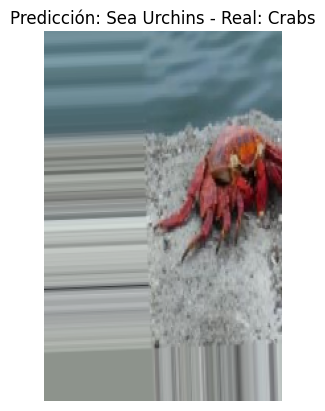

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


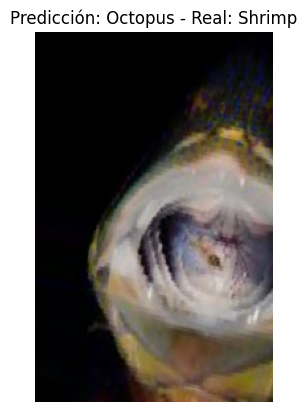

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


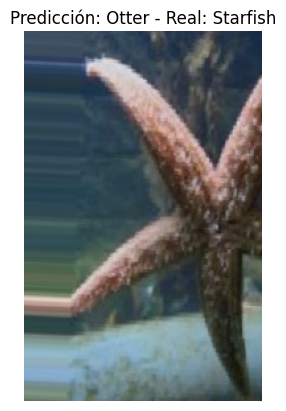

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


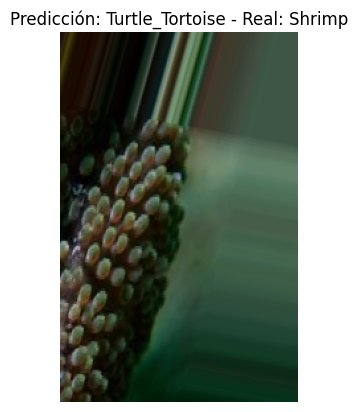

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


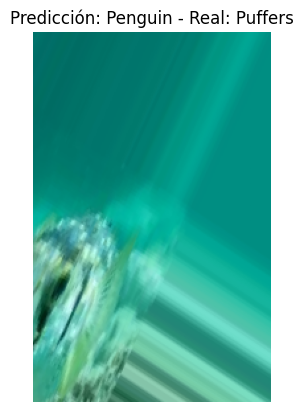

86/86 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.2326 - loss: 2.4971
Precisión del modelo: 24.76%
Pérdida del modelo: 2.4757


In [14]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
    img, label = next(validation_generator)
    img_sample = img[0]
    true_label = label[0]
    class_names = list(validation_generator.class_indices.keys())
    img_sample = np.expand_dims(img_sample, axis=0)
    prediction = model.predict(img_sample)
    predicted_class = class_names[np.argmax(prediction)]
    plt.imshow(img_sample[0])
    plt.title(f"Predicción: {predicted_class} - Real: {class_names[np.argmax(true_label)]}")
    plt.axis('off')
    plt.show()

loss, accuracy = model.evaluate(validation_generator)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print(f"Pérdida del modelo: {loss:.4f}")


**Paso 9: Mejora Continua de la Red Neuronal**
En este paso, implementamos un método para mejorar la eficiencia de la red neuronal a largo plazo. A través de la interacción con el usuario, el modelo hace predicciones sobre nuevas imágenes cargadas, y si la predicción es incorrecta, el usuario puede proporcionar la clasificación correcta. Esta retroalimentación se puede usar para ajustar el modelo en el futuro, ayudando a que la red neuronal aprenda de los errores y mejore con el tiempo.


Saving 665f17d0fb4bfc1e811468c3_9.jpg to 665f17d0fb4bfc1e811468c3_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


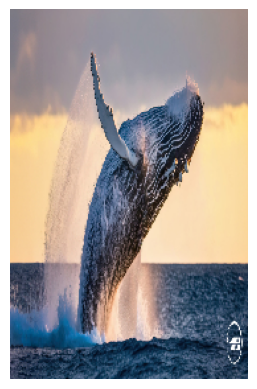

Predicción del modelo: Turtle_Tortoise
¿Es correcta la predicción? (si/no): no
¿Cuál es la clase correcta? (Opciones: Clams, Corals, Crabs, Dolphin, Eel, Fish, Jelly Fish, Lobster, Nudibranchs, Octopus, Otter, Penguin, Puffers, Sea Rays, Sea Urchins, Seahorse, Seal, Sharks, Shrimp, Squid, Starfish, Turtle_Tortoise, Whale): Whale
La clase correcta es: Whale


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files  # Necesario para cargar imágenes desde el dispositivo

def cargar_imagen():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

def predecir_imagen(img_path):
    img = image.load_img(img_path, target_size=(280, 180))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_names = list(validation_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]
    return img, predicted_class

imagen_path = cargar_imagen()
img, predicted_class = predecir_imagen(imagen_path)

plt.imshow(img)
plt.axis('off')
plt.show()

print(f"Predicción del modelo: {predicted_class}")
respuesta = input("¿Es correcta la predicción? (si/no): ")

if respuesta.lower() == 'no':
    correcta = input(f"¿Cuál es la clase correcta? (Opciones: {', '.join(class_names)}): ")
    print(f"La clase correcta es: {correcta}")
